In [1]:
# Import necessary dependecies
from fastai.tabular.all import *

In [2]:
# Reading the Data
data = pd.read_csv("/content/Dataset salary 2024.csv", low_memory=False)
df = pd.DataFrame(data)

In [3]:
# Taking a look at the data
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [4]:
# Sorting the years
df = df.sort_values("work_year")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16467,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S
16468,2020,SE,FT,Big Data Engineer,100000,EUR,114047,PL,100,GB,S
...,...,...,...,...,...,...,...,...,...,...,...
19,2024,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16534 entries, 16529 to 18
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.5+ MB


In [6]:
# Looking at ordinal category
df["experience_level"].unique()

array(['SE', 'EN', 'MI', 'EX'], dtype=object)

In [7]:
# Looking at ordinal category
df["company_size"].unique()

array(['L', 'S', 'M'], dtype=object)

In [8]:
# Creating a suitable ordering of levels
experience_lvl_order = ['EX','SE','MI','EN']
company_size_order = ['L', 'M', 'S']

df['experience_level'] = df['experience_level'].astype('category')
df['experience_level'].cat.set_categories(experience_lvl_order, ordered=True)

df['company_size'] = df['company_size'].astype('category')
df['company_size'].cat.set_categories(company_size_order, ordered=True)

,company_size
16529,L
16532,L
16531,S
16467,S
16468,S
...,...
19,L
2,M
1,M
0,M


In [9]:
# Creating the dependent variable
dep_var = "salary_in_usd"
df[dep_var] = np.log(df[dep_var]) # Applying log-transformation

In [10]:
# Dropping unnecessary columns
df.drop("salary_currency", axis=1, inplace=True)
df.drop("salary", axis=1, inplace=True)

In [11]:
# Replacing columns with numerical categorical values and filling in missing values
procs = [Categorify, FillMissing]

In [12]:
# Creating test set
test_df = df[13227:]
test_set = test_df.to_csv("test_set.csv",sep=',', encoding='utf-8')

In [13]:
test_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3349,2024,MI,FT,Data Scientist,11.387362,US,100,US,M
3350,2024,MI,FT,Data Engineer,11.798104,US,0,US,M
3351,2024,MI,FT,Data Engineer,10.973357,US,0,US,M
3352,2024,SE,FT,Data Engineer,12.345400,US,0,US,M
3353,2024,SE,FT,Data Engineer,12.213048,US,0,US,M
...,...,...,...,...,...,...,...,...,...
19,2024,SE,FT,Applied Scientist,11.820410,US,0,US,L
2,2024,SE,FT,Data Engineer,11.779129,US,0,US,M
1,2024,SE,FT,AI Engineer,11.430826,US,0,US,M
0,2024,SE,FT,AI Engineer,12.219630,US,0,US,M


In [14]:
# Creating a training set
train_df = df[:10582]
train_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16529,2020,SE,FT,Data Scientist,12.928779,US,100,US,L
16532,2020,EN,CT,Business Data Analyst,11.512925,US,100,US,L
16531,2020,EN,FT,Data Scientist,11.561716,US,100,US,S
16467,2020,EN,FT,Data Engineer,10.637993,JP,100,JP,S
16468,2020,SE,FT,Big Data Engineer,11.644366,PL,100,GB,S


In [15]:
# Creating a validation dataset
valid_df = df[10583:13227]
valid_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5996,2024,SE,FT,Data Scientist,11.989160,US,0,US,M
5997,2024,SE,FT,Data Scientist,11.799607,US,0,US,M
5998,2024,MI,FT,Data Scientist,11.994580,US,0,US,M
5999,2024,MI,FT,Data Scientist,11.483754,US,0,US,M
6000,2024,SE,FT,Machine Learning Engineer,12.187654,US,100,US,M
...,...,...,...,...,...,...,...,...,...
3376,2024,SE,FT,Data Analyst,12.007622,US,0,US,M
3377,2024,SE,FT,Data Analyst,11.599103,US,0,US,M
3378,2024,SE,FT,Data Analyst,11.849398,US,0,US,M
3347,2024,MI,FT,Data Engineer,11.002100,US,100,US,M


In [16]:
# Creating lists of indices of both train and validation sets
splits = (list(train_df.index), list(valid_df.index))

In [17]:
# Distinguishing between categorical and continous columns
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

In [18]:
# Creating the tabular pandas object
to = TabularPandas(df, procs,cat,cont, y_names=dep_var, splits=splits)

In [19]:
# Looking at the number of instances in each set
len(to.train), len(to.valid)

(10582, 2644)

In [20]:
to.classes['company_size']

['#na#', 'L', 'M', 'S']

In [21]:
# Creating dependent and independent variables
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [22]:
# Importing the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Creating the Decision Tree
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y) # Training the tree

DecisionTreeRegressor(max_leaf_nodes=4)

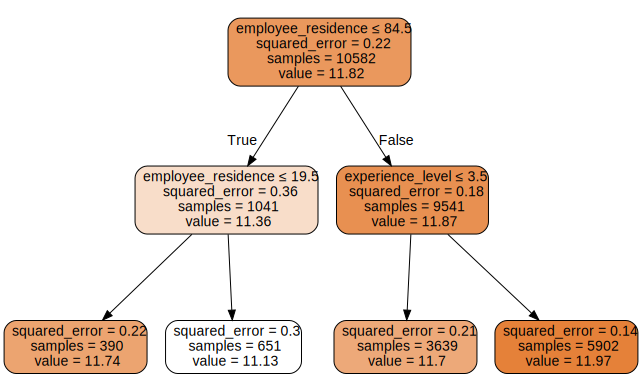

In [23]:
!pip install fastbook
# Displaying the tree to see what it has learned
from fastbook import draw_tree
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


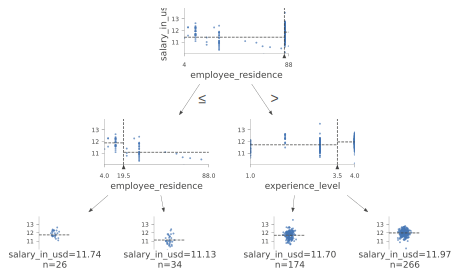

In [24]:
!pip install dtreeviz
# Taking random samples to see how the tree makes its decisions
samp_idx = np.random.permutation(len(y))[:500]

# Importing the tree visualization library
import dtreeviz

# Creating the dtreeviz visualization object
viz_model = dtreeviz.model(m,
                           X_train=xs.iloc[samp_idx],
                           y_train=y.iloc[samp_idx],
                           feature_names=xs.columns,
                           target_name=dep_var)

# Displaying the visualization
viz_model.view()


In [25]:
# Building a bigger tree
m = DecisionTreeRegressor()
m.fit(xs, y)

DecisionTreeRegressor()

In [26]:
# Checking the rmse of our model
def r_mse(preds, y): return round(math.sqrt(((preds - y)**2).mean()),6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)
m_rmse(m, xs, y) # Checking rmse on train set

0.32711

In [27]:
m_rmse(m, valid_xs, valid_y) # Checking rmse on valid set

0.382385

In [28]:
# Checking the number of leaf nodes and data points
m.get_n_leaves(), len(xs)

(np.int64(890), 10582)

In [29]:
# Increasing the number of min samples per leaf to reduce overfitting
m = DecisionTreeRegressor(min_samples_leaf=15)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.353268, 0.367071)

In [30]:
m.get_n_leaves()

np.int64(202)

In [31]:
# Importing the random forest
from sklearn.ensemble import RandomForestRegressor

# Creating a Random Forest
def rf(xs, y, max_samples=None, min_samples_leaf=10, n_estimators=300, max_features=0.5, **kwargs):
  return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators, max_samples=max_samples, min_samples_leaf=min_samples_leaf, max_features=max_features, oob_score=True).fit(xs, y)

In [32]:
# Fitting the data to the random forest
m = rf(xs, y)
m_rmse(m,xs, y), m_rmse(m, valid_xs, valid_y)

(0.356488, 0.365004)

In [33]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
r_mse(preds.mean(0), valid_y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature name

0.365004

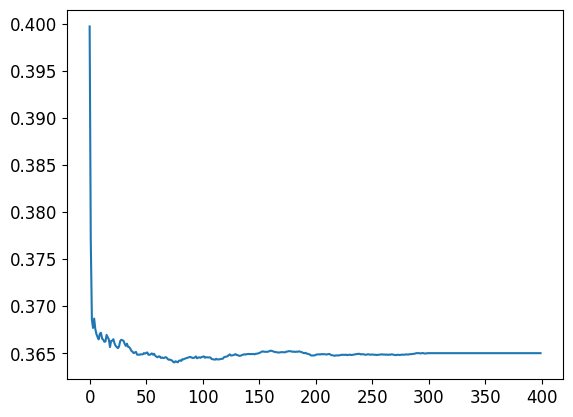

In [34]:
# Seeing the number trees and their RMSE
plt.plot([r_mse(preds[:i+1].mean(0),valid_y) for i in range(400)])

In [35]:
# Looking at the out-of-bag error
r_mse(m.oob_prediction_, y)

0.36497

In [36]:
# Function that returns feature importances
def rf_feat_importance(m, df):
  return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
0,experience_level,0.327313
2,job_title,0.282384
3,employee_residence,0.222072
4,company_location,0.135913
7,remote_ratio,0.012636
6,work_year,0.010332
5,company_size,0.008835
1,employment_type,0.000514


<Axes: ylabel='cols'>

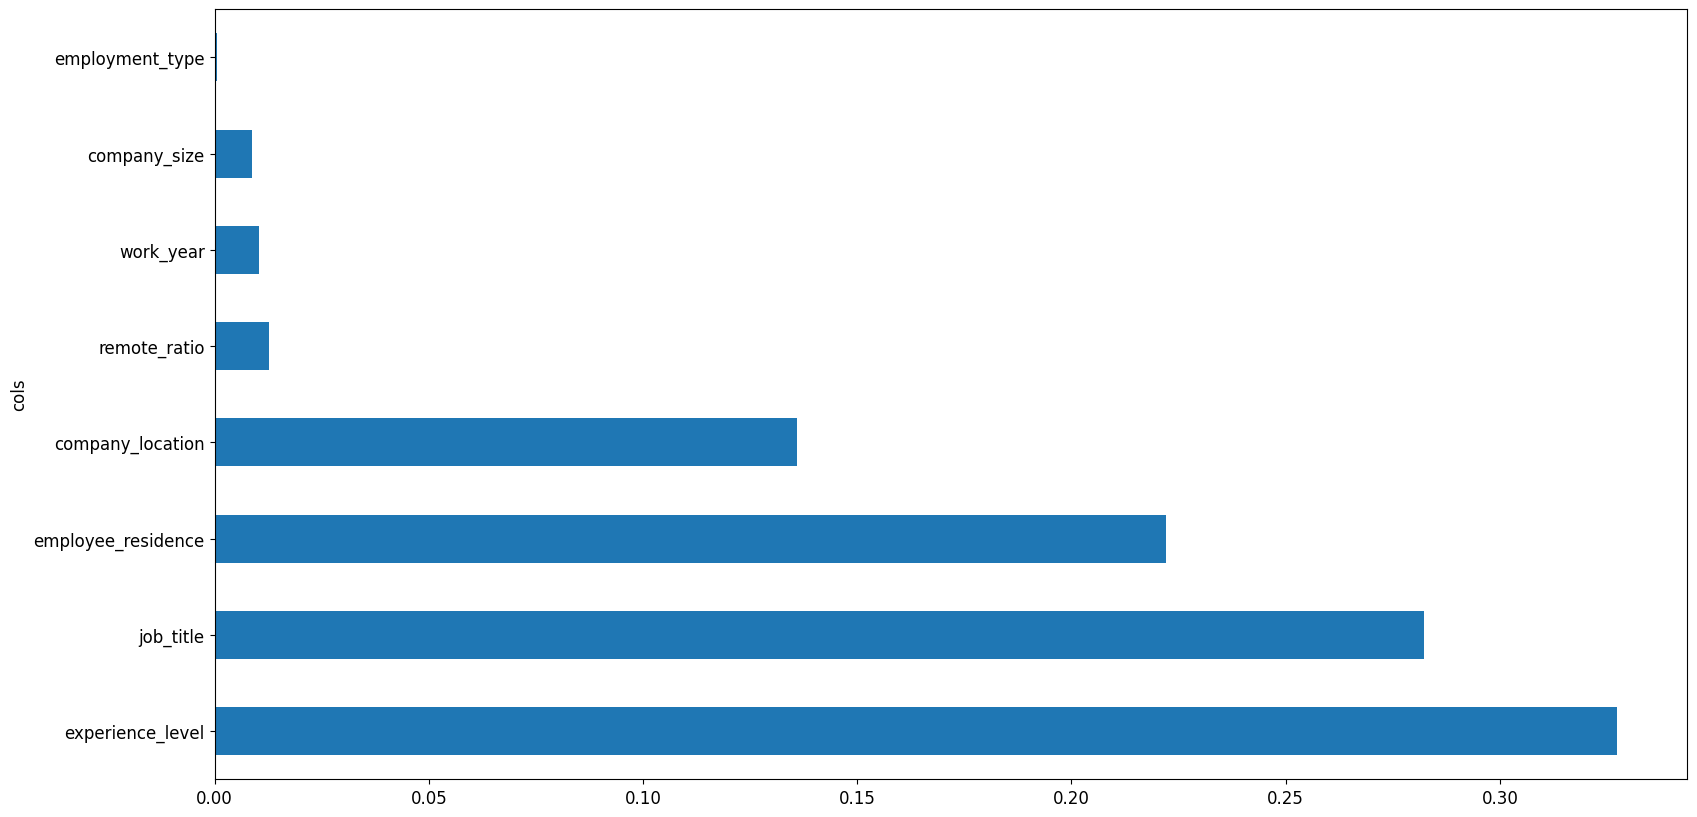

In [37]:
# Plotting feature importances
def plot_fi(fi):
  return fi.plot('cols', 'imp', 'barh', figsize=(19,10), legend=False)

plot_fi(fi[:30])

In [38]:
# Removing Low-Importance variables
to_keep = fi[fi.imp>0.05].cols
len(to_keep)

4

In [39]:
# Retraining our model using the subset of the most important columns
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]
m = rf(xs_imp, y) # Training
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.36905, 0.377871)

<Axes: ylabel='cols'>

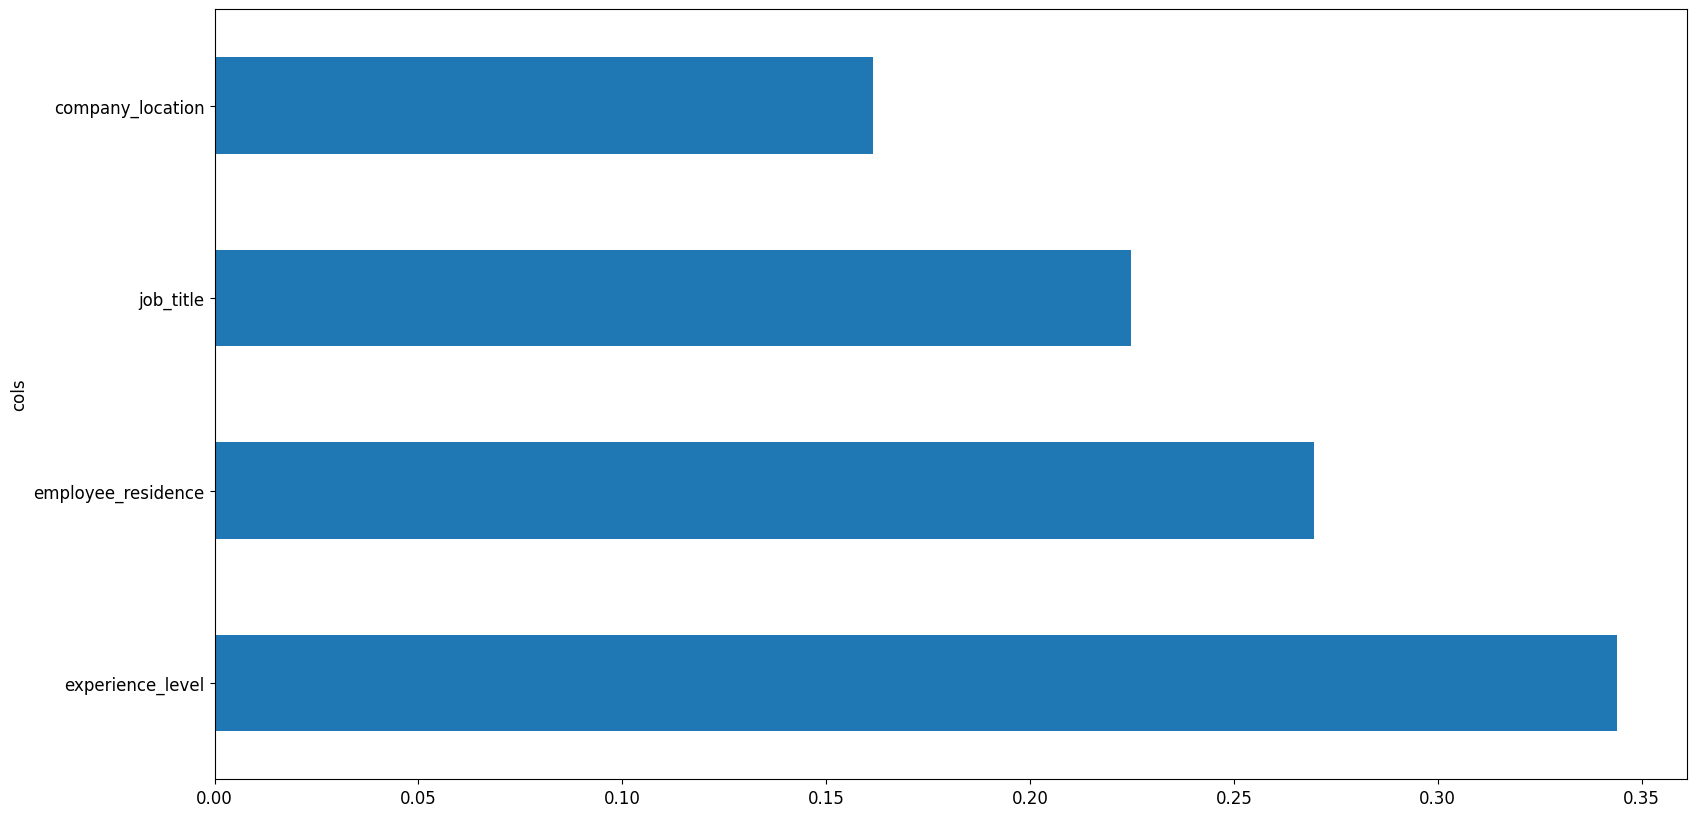

In [40]:
# Plotting the importance of the new subset of the most important features
plot_fi(rf_feat_importance(m, xs_imp))

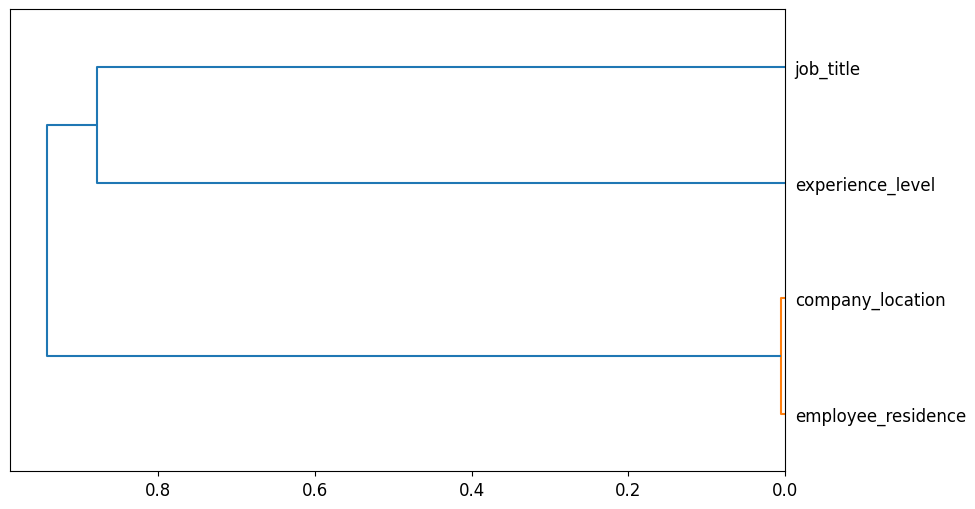

In [41]:
# Clustering columns to see which features are highly correlated
from fastbook import cluster_columns
cluster_columns(xs_imp)

In [42]:
# Simplifying our model so it can detect redundant features, we will use the oob as the baseline
def get_oob(df):
  m = RandomForestRegressor(n_estimators=300, max_samples=1000, max_features=0.5, min_samples_leaf=30, n_jobs=-1, oob_score=True)
  m.fit(df, y)
  return m.oob_score_

get_oob(xs_imp)

0.3174446382606798

In [43]:
# Dropping one column at a time to see how oob behaves
{c:get_oob(xs_imp.drop(c, axis=1)) for c in ('company_location', 'employee_residence')}

{'company_location': 0.2986151242757977,
 'employee_residence': 0.2898221279371628}

In [44]:
# Creating final features
xs_final = xs_imp
valid_xs_final = valid_xs_imp

([<matplotlib.axis.YTick at 0x7829a061b2f0>,
 [Text(0, 0, '#na#'),
  Text(0, 1, 'EN'),
  Text(0, 2, 'EX'),
  Text(0, 3, 'MI'),
  Text(0, 4, 'SE')])

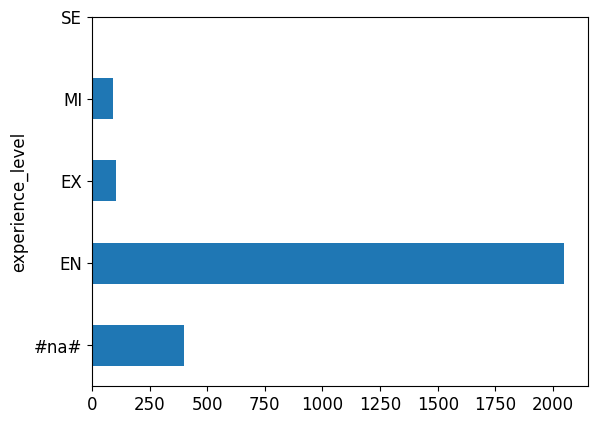

In [45]:
# Plotting the number of samples in each level of the experience level category
p = valid_xs_final['experience_level'].value_counts(sort=False).plot.barh()
c = to.classes['experience_level']
plt.yticks(range(len(c)), c)

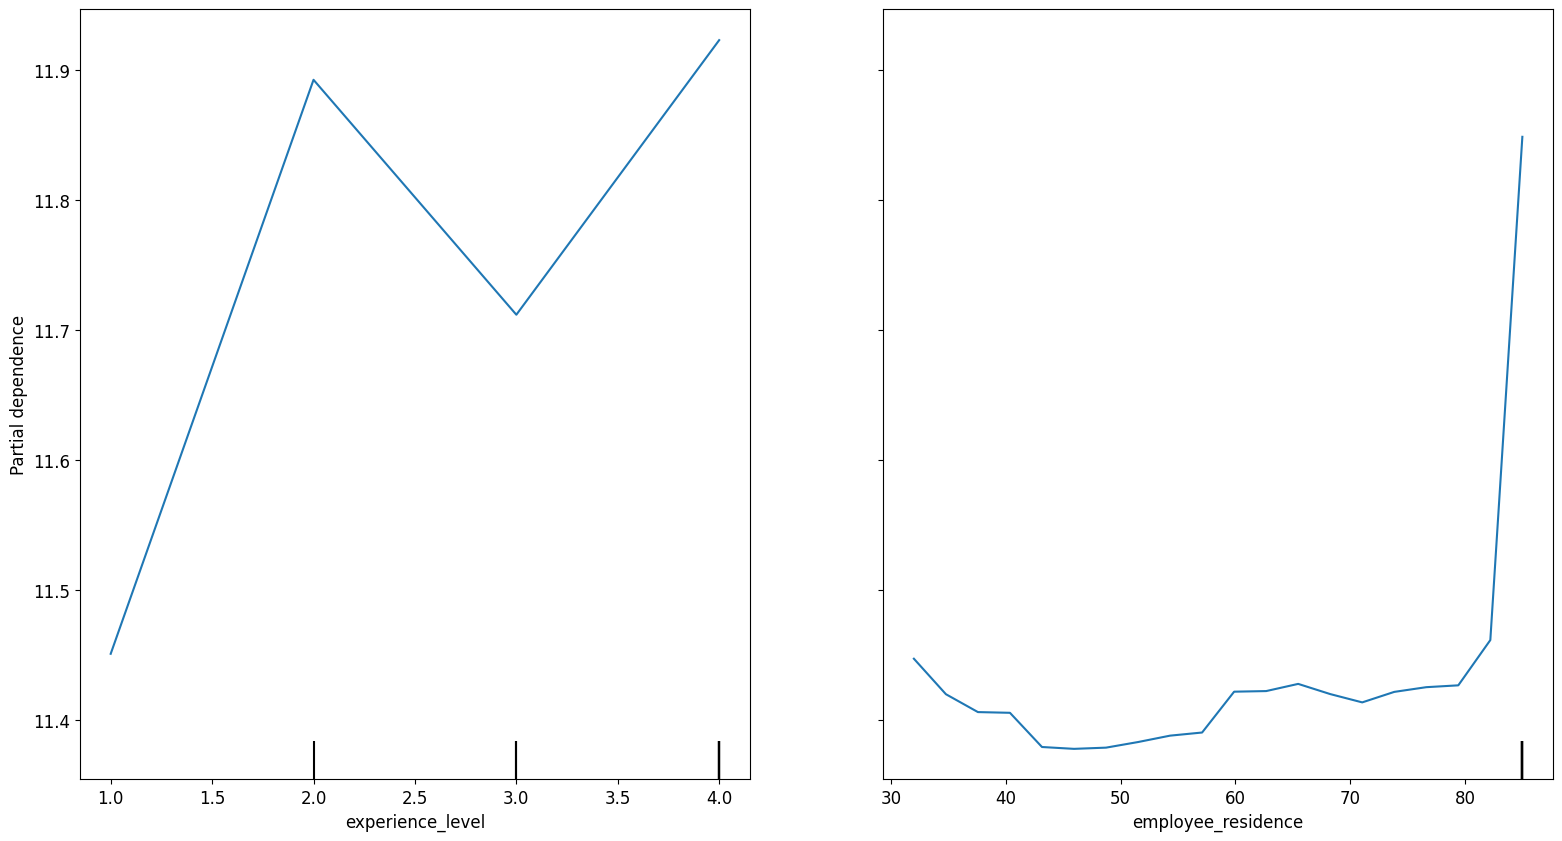

In [46]:
# Partial dependence
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(19,10))
PartialDependenceDisplay.from_estimator(m, xs_final, features=['experience_level', 'employee_residence'], grid_resolution=20, ax=ax)
plt.show()

In [47]:
!pip install treeinterpreter # Used to tell us most important feature and how it influences prediction for a particular row
!pip install waterfallcharts # Draws chart of results
from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

/usr/local/lib/python3.12/dist-packages/waterfall_chart.py:141: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/usr/local/lib/python3.12/dist-packages/waterfall_chart.py:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

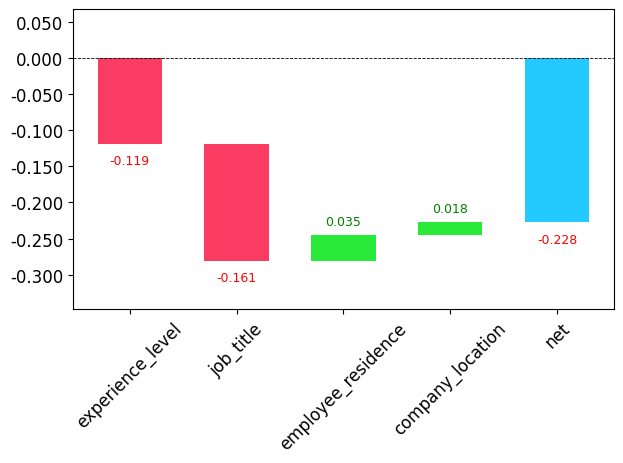

In [48]:
# Interpreting the model's prediction reasoning using SHAP
rows = valid_xs_final.iloc[:]
prediction, bias, contributions = treeinterpreter.predict(m, rows.values)
waterfall(valid_xs_final.columns, contributions[0], threshold=0.08, rotation_value=45, formatting='{:,.3f}')

In [49]:
# Finding out-of-domain data
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))
m= rf(df_dom, is_valid)
rf_feat_importance(m, df_dom)

,cols,imp
1,job_title,0.410838
0,experience_level,0.387249
2,employee_residence,0.106224
3,company_location,0.095689


In [50]:
# Getting the original baseline rmse of the random forest model
m = rf(xs_final, y)
print('original', m_rmse(m,xs=valid_xs_final, y=valid_y))

# Dropping each column at a time to see how it affects the RMSE
for c in ('job_title', 'experience_level','employee_residence', 'company_location'):
  m = rf(xs_final.drop(c, axis=1), y)
  print(c, m_rmse(m,valid_xs_final.drop(c, axis=1), valid_y))

  # Removing redundant column that causes domain-shift
xs_final = xs_final.drop('company_location', axis=1)
valid_xs_final = valid_xs_final.drop('company_location', axis=1)

# Training the model on the new subset of columns
m = rf(xs_final, y)
print('final', m_rmse(m, valid_xs_final, valid_y))

original 0.376944
job_title 0.406926
experience_level 0.408289
employee_residence 0.378142
company_location 0.376273
final 0.376156
